* grouplens MovieLens 2018 20M data: https://grouplens.org/datasets/movielens/20m/
* feature engineered genres by performing one hot encoding
* utilized random forest to confirm that this model would be a poor predictor when compared to recommender models

In [17]:
# import dependencies
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# import movies
df = pd.read_csv("../data/ml-20m/201820M.csv")
df.head()

,Unnamed: 0,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,2,3.5,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,2,3.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,13,2,3.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,29,2,3.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,34,2,3.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# set rating to what we are trying to predict
target = df["rating"].astype(int)

In [20]:
# removing ratings to create our x values
data = df
data.drop(["rating"],axis=1, inplace=True)
data.drop(["Unnamed: 0"],axis=1, inplace=True)

In [21]:
# data = data
feature_names = data.columns
data.head()

,userId,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [23]:
rf = RandomForestClassifier(n_estimators=75, max_depth=15)

In [24]:
rf = rf.fit(X_train, y_train)

In [25]:
rf.score(X_test, y_test)

0.4042458639545958

In [26]:
importances = rf.feature_importances_
importances

array([7.38319099e-02, 4.17972190e-01, 9.00227238e-06, 4.65828712e-02,
       2.56610999e-02, 1.88431003e-02, 2.04846326e-02, 3.99435293e-02,
       4.11210489e-02, 7.98092712e-03, 8.50217265e-02, 2.06518084e-02,
       1.06809870e-02, 2.79272245e-02, 9.03373599e-03, 9.89437110e-03,
       2.72250671e-02, 2.25153945e-02, 2.47363795e-02, 3.54436370e-02,
       2.65441852e-02, 7.89517142e-03])

In [27]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4179721901842188, 'movieId'),
 (0.08502172648326542, 'Drama'),
 (0.07383190990314817, 'userId'),
 (0.04658287116141981, 'Action'),
 (0.04112104890144953, 'Crime'),
 (0.0399435292681279, 'Comedy'),
 (0.035443637012909465, 'Thriller'),
 (0.02792722449716507, 'Horror'),
 (0.02722506714911257, 'Mystery'),
 (0.026544185178151155, 'War'),
 (0.025661099915272646, 'Adventure'),
 (0.02473637953301212, 'Sci-Fi'),
 (0.022515394541923858, 'Romance'),
 (0.020651808419498135, 'Fantasy'),
 (0.02048463262006339, 'Children'),
 (0.018843100334503125, 'Animation'),
 (0.010680986995241627, 'Film-Noir'),
 (0.00989437110157796, 'Musical'),
 (0.009033735994821554, 'IMAX'),
 (0.007980927115393043, 'Documentary'),
 (0.0078951714173453, 'Western'),
 (9.002272379244716e-06, '(no genres listed)')]

In [28]:
sns.set(rc={'figure.figsize':(6,10)})

No handles with labels found to put in legend.


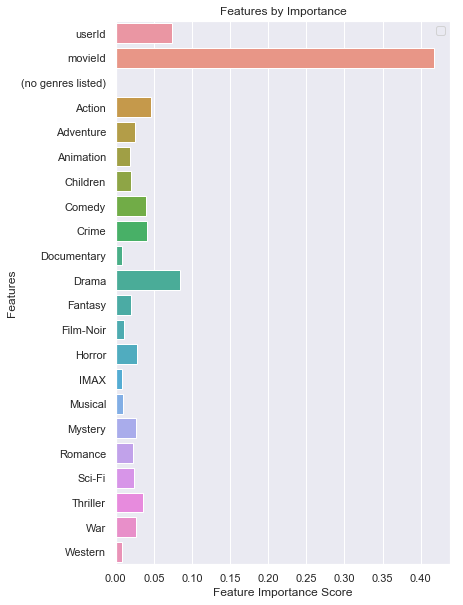

In [33]:
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Features by Importance")
plt.legend()
plt.savefig("../images/RF2018OHE.png")
plt.show()

In [30]:
predicted_y = rf.predict(X_test)

In [31]:
actual_y = y_test.to_numpy()

In [32]:
mean_squared_error(actual_y, predicted_y)


1.1729943164750225